# BACKGROUND

r/Place began on 1 April 2022, and lasted for four days, including two expansions of the canvas to allow for more space. The color palette was also expanded on the second and third days.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

In [3]:
cache = {}

def cached_date_parser(s):
    if s in cache:
        return cache[s]
    dt = pd.to_datetime(str(s)[:16])
    cache[s] = dt
    return dt

In [4]:
%%time
place_data = pd.read_csv('../data/place-data-chunk.csv', parse_dates=['timestamp'],date_parser=cached_date_parser)

CPU times: user 1min 23s, sys: 544 ms, total: 1min 24s
Wall time: 1min 25s


In [5]:
place_data.dtypes

timestamp      datetime64[ns]
user_id                object
pixel_color            object
coordinate             object
dtype: object

In [6]:
place_data

,timestamp,user_id,pixel_color,coordinate
0,2022-04-04 00:53:00,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...,#00CCC0,"826,1048"
1,2022-04-04 00:53:00,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...,#94B3FF,"583,1031"
2,2022-04-04 00:53:00,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...,#6A5CFF,"1873,558"
3,2022-04-04 00:54:00,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...,#009EAA,"1627,255"
4,2022-04-04 00:55:00,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...,#94B3FF,"49,1478"
...,...,...,...,...
1175312,2022-04-04 01:47:00,N4t3tvwmNpHyojDGqgLPJovMEqn5GMCZWXKEjLrAgqaHuw...,#FFFFFF,"650,506"
1175313,2022-04-04 01:47:00,voRe+t3ZoLIwJZfHfYWJMjNmZAQKk+QUAdpYvZIKrg4env...,#FFFFFF,"474,1238"
1175314,2022-04-04 01:47:00,neYk8AKR6PzfgdBveZfpQL/DfMs9/DshXCeFs2UZU6h+Bg...,#FFFFFF,"530,635"
1175315,2022-04-04 01:47:00,LGQh6ZBGfUgc/z0hbdhbKQgtdPypeTkwyRwKY85t3a0U4o...,#FFFFFF,"1361,1565"


# Basic statistics 

In [7]:
print(f"There are {place_data.shape[0]} rows in total")

There are 1175317 rows in total


In [8]:
unique_ids = pd.unique(place_data.user_id)
print(f"A total of {len(unique_ids)} users participated")

A total of 612873 users participated


In [9]:
counter_users = Counter(place_data.user_id)
counter_colors = Counter(place_data.pixel_color)
counter_pixels = Counter(place_data.coordinate)

In [10]:
counter_colors.most_common(10)

[('#000000', 270396),
 ('#FFFFFF', 205666),
 ('#2450A4', 63860),
 ('#FF4500', 63430),
 ('#BE0039', 61356),
 ('#FFD635', 54031),
 ('#51E9F4', 46105),
 ('#FFA800', 41618),
 ('#7EED56', 31233),
 ('#FF99AA', 28909)]

In [11]:
counter_pixels.most_common(10)

[('1852,590', 474),
 ('0,0', 439),
 ('359,564', 395),
 ('1851,590', 380),
 ('1999,1999', 377),
 ('1853,590', 343),
 ('1850,590', 336),
 ('1854,590', 305),
 ('349,564', 303),
 ('1400,1748', 270)]

In [12]:
len(pd.unique(place_data.coordinate))

543774

# HEATMAP OF THE CHANGES MADE TO THE CANVAS 
## Let's represent how the canvas was manipulated by the community coloring more strongly those pixels who were most fought for.

In [13]:
heatmap_data = [(tuple(map(int, i[0].split(','))), i[1]) for i in list(counter_pixels.items())]

**create heatmap with this data**

In [52]:
heatmap_matrix = np.zeros((2000, 2000), dtype=int)

for p in heatmap_data:
    i = p[0][0]
    j = p[0][1]
    heatmap_matrix[i,j] = p[1]

In [53]:
heatmap_matrix

array([[439,  55,  15, ...,   8,  14, 250],
       [ 58,  74,  12, ...,  11,  42,  19],
       [ 19,   9,  22, ...,   7,   9,   6],
       ...,
       [ 10,   8,   4, ...,   3,   3,  22],
       [ 20,   7,   7, ...,   7,  26,  55],
       [196,  12,   8, ...,   8,  45, 377]])

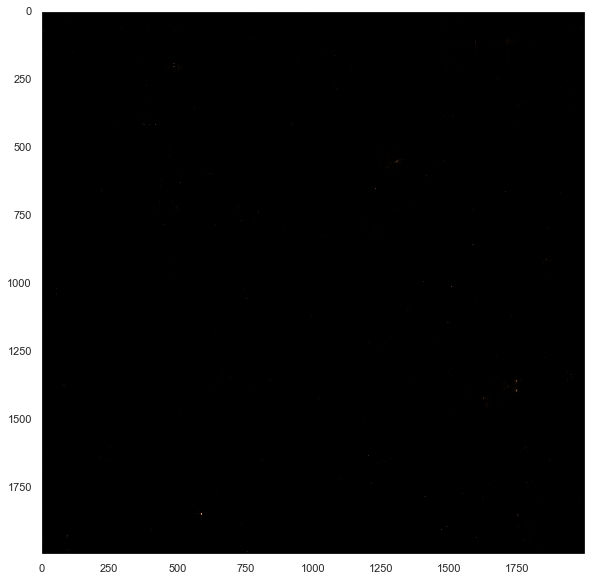

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(heatmap_matrix, cmap='copper', interpolation='nearest')
plt.grid(False)

In [55]:
orange_cmap = sns.color_palette("YlOrBr", as_cmap=True)
viridis_cmap = sns.color_palette("viridis", as_cmap=True)

<AxesSubplot:>

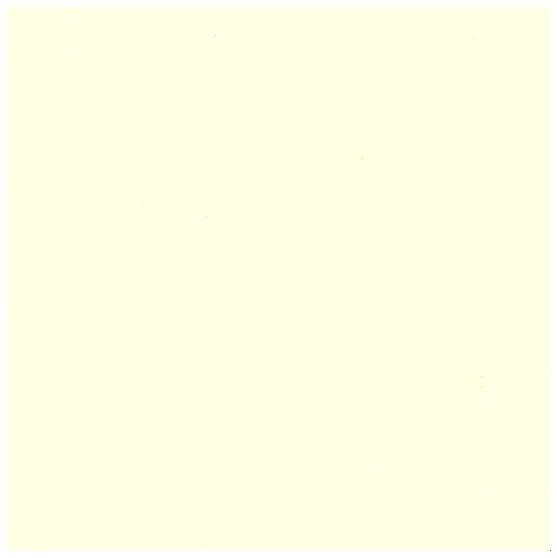

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(heatmap_matrix, cbar=False, cmap=orange_cmap, square=True, xticklabels=False, yticklabels=False)

### import skimage.measure

downsampled_heatmap = skimage.measure.block_reduce(heatmap_matrix, (50,50), np.mean)

In [57]:
downsampled_heatmap.shape

(40, 40)

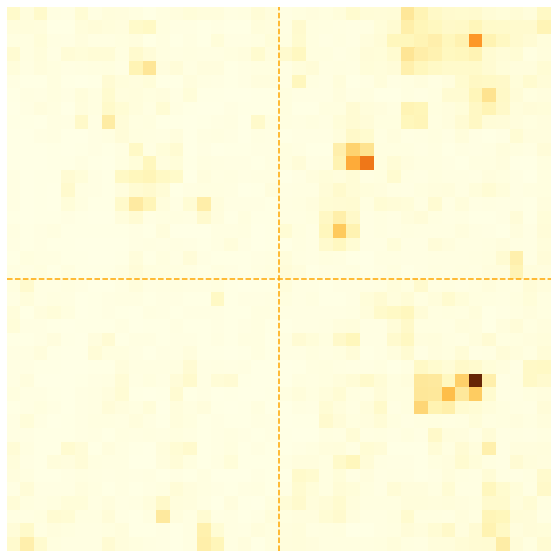

In [58]:
plt.figure(figsize=(10,10))
orange_cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(downsampled_heatmap, linecolor='yellow', cbar=False, cmap=orange_cmap, square=True, xticklabels=False, yticklabels=False)
plt.axhline(y=downsampled_heatmap.shape[1] // 2, color='orange', linestyle='--')
plt.axvline(x=downsampled_heatmap.shape[0] // 2, color='orange', linestyle='--')

# CHANGES OVER TIME
## Let's represent how active we were during these 3 caotic days

In [22]:
place_data

,timestamp,user_id,pixel_color,coordinate
0,2022-04-04 00:53:00,ovTZk4GyTS1mDQnTbV+vDOCu1f+u6w+CkIZ6445vD4XN8a...,#00CCC0,"826,1048"
1,2022-04-04 00:53:00,6NSgFa1CvIPly1VniNhlbrmoN3vgDFbMSKqh+c4TTfrr3d...,#94B3FF,"583,1031"
2,2022-04-04 00:53:00,O5Oityp3Z3owzTuwM9XnMggpLcqKEumsOMKGhRiDTTImWb...,#6A5CFF,"1873,558"
3,2022-04-04 00:54:00,tc273UiqS0wKa6VwiOs/iz/t4LyPYrhL2Q347awn11IQQE...,#009EAA,"1627,255"
4,2022-04-04 00:55:00,OOWsU/HLb4UUkQwclDeXFtsJTOXMlAdNHiRpFA1Qk+SxUr...,#94B3FF,"49,1478"
...,...,...,...,...
1175312,2022-04-04 01:47:00,N4t3tvwmNpHyojDGqgLPJovMEqn5GMCZWXKEjLrAgqaHuw...,#FFFFFF,"650,506"
1175313,2022-04-04 01:47:00,voRe+t3ZoLIwJZfHfYWJMjNmZAQKk+QUAdpYvZIKrg4env...,#FFFFFF,"474,1238"
1175314,2022-04-04 01:47:00,neYk8AKR6PzfgdBveZfpQL/DfMs9/DshXCeFs2UZU6h+Bg...,#FFFFFF,"530,635"
1175315,2022-04-04 01:47:00,LGQh6ZBGfUgc/z0hbdhbKQgtdPypeTkwyRwKY85t3a0U4o...,#FFFFFF,"1361,1565"


In [74]:
plot_minute_activity = place_data.resample('T', on='timestamp').pixel_color.count()

In [75]:
plot_minute_activity

timestamp
2022-04-04 00:53:00    11152
2022-04-04 00:54:00    22145
2022-04-04 00:55:00    23140
2022-04-04 00:56:00    23268
2022-04-04 00:57:00    19834
2022-04-04 00:58:00    20252
2022-04-04 00:59:00    21008
2022-04-04 01:00:00    21084
2022-04-04 01:01:00    24476
2022-04-04 01:02:00    22132
2022-04-04 01:03:00    21121
2022-04-04 01:04:00    20983
2022-04-04 01:05:00    20449
2022-04-04 01:06:00    22407
2022-04-04 01:07:00    25109
2022-04-04 01:08:00    20391
2022-04-04 01:09:00    19825
2022-04-04 01:10:00    19312
2022-04-04 01:11:00    21241
2022-04-04 01:12:00    22925
2022-04-04 01:13:00    21026
2022-04-04 01:14:00    20728
2022-04-04 01:15:00    19865
2022-04-04 01:16:00    20253
2022-04-04 01:17:00    19635
2022-04-04 01:18:00    20467
2022-04-04 01:19:00    20666
2022-04-04 01:20:00    25194
2022-04-04 01:21:00    21973
2022-04-04 01:22:00    23175
2022-04-04 01:23:00    20984
2022-04-04 01:24:00    21020
2022-04-04 01:25:00    24014
2022-04-04 01:26:00    21535
2022

In [24]:
plot_hour_activity = place_data.resample('H', on='timestamp').user_id.count()

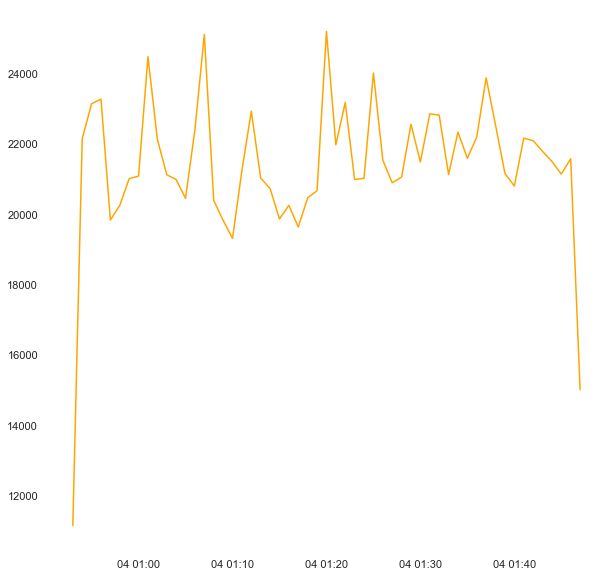

In [25]:
plt.rcParams['axes.facecolor'] = 'none'
plt.figure(figsize=(10,10))
plt.plot(plot_minute_activity, color='orange')
plt.grid(False)

In [88]:
place_data.groupby(by=['user_id', 'coordinate'], sort=True).count()

timestamp  \
user_id                                            coordinate              
+++Bbwl4+BDsBbTWE1sUli0tdG5utICDNBaTH/5Xd9UUl1d... 98,594              1   
+++OhgvtDhw/AG8EqppokY/MSCQByvjQ/4CmVq/o31mFMZu... 721,667             1   
                                                   980,625             1   
+++emUATmnPhHaEcagNPXqz8A44cUyiU80myi88W1qp+l9D... 1386,1720           1   
+++wwNXUhnAQlmtUIFIXsHQTt2Dyd/pbVil3JXOXA+P+UAQ... 184,1446            1   
...                                                                  ...   
zzy8ncksBsaYLrb3So9W5iYrsNWiKfjrsw66so/nXTbzw1G... 807,1178            1   
                                                   834,1260            1   
                                                   840,1190            1   
                                                   885,1277            1   
zzznADo13U6Gt+iljk89Zsr4g1Z4RPdA663DVXMBzEKfIbL... 74,497              1   

                                                               pixel_color  
user_id                                            coordinate               
+++Bbwl4+BDsBbTWE1sUli0tdG5utICDNBaTH/5Xd9UUl1d... 98,594                1  
+++OhgvtDhw/AG8EqppokY/MSCQByvjQ/4CmVq/o31mFMZu... 721,667               1  
                                                   980,625               1  
+++emUATmnPhHaEcagNPXqz8A44cUyiU80myi88W1qp+l9D... 1386,1720             1  
+++wwNXUhnAQlmtUIFIXsHQTt2Dyd/pbVil3JXOXA+P+UAQ... 184,1446              1  
...                                                                    ...  
zzy8ncksBsaYLrb3So9W5iYrsNWiKfjrsw66so/nXTbzw1G... 807,1178              1  
                                                   834,1260              1  
                                                   840,1190              1  
                                                   885,1277              1  
zzznADo13U6Gt+iljk89Zsr4g1Z4RPdA663DVXMBzEKfIbL... 74,497                1  

[1162062 rows x 2 columns]